In [1]:
import pandas as pd

df = pd.read_csv('/content/accident data set.csv')

print("Successfully loaded the data into a DataFrame. Here are the first 5 rows:")
df.head()

Successfully loaded the data into a DataFrame. Here are the first 5 rows:


,"Accident_ID,Date,Time,City,Latitude,Longitude,Road_Condition,Weather,Time_of_Day,Severity,Vehicle_Type"
0,"A001,2025-01-05,08:30,Chennai,13.0827,80.2707,..."
1,"A002,2025-01-05,22:15,Madurai,9.9252,78.1198,D..."
2,"A003,2025-01-06,18:45,Coimbatore,11.0168,76.95..."
3,"A004,2025-01-06,13:20,Trichy,10.7905,78.7047,D..."
4,"A005,2025-01-07,07:10,Salem,11.6643,78.1460,We..."


In [2]:
df = pd.read_csv('/content/accident data set.csv', sep=',')

print("Re-loaded the data with correct delimiter. Here are the first 5 rows:")
df.head()

Re-loaded the data with correct delimiter. Here are the first 5 rows:


,"Accident_ID,Date,Time,City,Latitude,Longitude,Road_Condition,Weather,Time_of_Day,Severity,Vehicle_Type"
0,"A001,2025-01-05,08:30,Chennai,13.0827,80.2707,..."
1,"A002,2025-01-05,22:15,Madurai,9.9252,78.1198,D..."
2,"A003,2025-01-06,18:45,Coimbatore,11.0168,76.95..."
3,"A004,2025-01-06,13:20,Trichy,10.7905,78.7047,D..."
4,"A005,2025-01-07,07:10,Salem,11.6643,78.1460,We..."


In [3]:
single_column_name = df.columns[0]

column_headers = single_column_name.split(',')

df_corrected = df[single_column_name].str.split(',', expand=True)

df_corrected.columns = column_headers

df = df_corrected.copy()
print("Successfully corrected the DataFrame parsing. Here are the first 5 rows:")
df.head()

Successfully corrected the DataFrame parsing. Here are the first 5 rows:


,Accident_ID,Date,Time,City,Latitude,Longitude,Road_Condition,Weather,Time_of_Day,Severity,Vehicle_Type
0,A001,2025-01-05,08:30,Chennai,13.0827,80.2707,Wet,Rain,Morning,High,Car
1,A002,2025-01-05,22:15,Madurai,9.9252,78.1198,Dry,Clear,Night,Medium,Bike
2,A003,2025-01-06,18:45,Coimbatore,11.0168,76.9558,Poor,Fog,Evening,High,Truck
3,A004,2025-01-06,13:20,Trichy,10.7905,78.7047,Dry,Clear,Afternoon,Low,Car
4,A005,2025-01-07,07:10,Salem,11.6643,78.1460,Wet,Rain,Morning,Medium,Bike


In [4]:
print("--- DataFrame Info ---")
df.info()

print("\n--- Missing Values ---")
print(df.isnull().sum())


df['Date'] = pd.to_datetime(df['Date'])


df['Latitude'] = pd.to_numeric(df['Latitude'])
df['Longitude'] = pd.to_numeric(df['Longitude'])

print("\n--- DataFrame after type conversions (first 5 rows) ---")
df.head()

--- DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Accident_ID     10 non-null     object
 1   Date            10 non-null     object
 2   Time            10 non-null     object
 3   City            10 non-null     object
 4   Latitude        10 non-null     object
 5   Longitude       10 non-null     object
 6   Road_Condition  10 non-null     object
 7   Weather         10 non-null     object
 8   Time_of_Day     10 non-null     object
 9   Severity        10 non-null     object
 10  Vehicle_Type    10 non-null     object
dtypes: object(11)
memory usage: 1012.0+ bytes

--- Missing Values ---
Accident_ID       0
Date              0
Time              0
City              0
Latitude          0
Longitude         0
Road_Condition    0
Weather           0
Time_of_Day       0
Severity          0
Vehicle_Type      0
dtype: int64

,Accident_ID,Date,Time,City,Latitude,Longitude,Road_Condition,Weather,Time_of_Day,Severity,Vehicle_Type
0,A001,2025-01-05,08:30,Chennai,13.0827,80.2707,Wet,Rain,Morning,High,Car
1,A002,2025-01-05,22:15,Madurai,9.9252,78.1198,Dry,Clear,Night,Medium,Bike
2,A003,2025-01-06,18:45,Coimbatore,11.0168,76.9558,Poor,Fog,Evening,High,Truck
3,A004,2025-01-06,13:20,Trichy,10.7905,78.7047,Dry,Clear,Afternoon,Low,Car
4,A005,2025-01-07,07:10,Salem,11.6643,78.1460,Wet,Rain,Morning,Medium,Bike


In [5]:
accidents_by_road_condition = df.groupby('Road_Condition').size().sort_values(ascending=False)

print("Accident frequency by Road Condition:")
print(accidents_by_road_condition)

Accident frequency by Road Condition:
Road_Condition
Dry     4
Poor    3
Wet     3
dtype: int64


In [6]:
accidents_by_weather_condition = df.groupby('Weather').size().sort_values(ascending=False)

print("Accident frequency by Weather Condition:")
print(accidents_by_weather_condition)

Accident frequency by Weather Condition:
Weather
Clear    4
Rain     4
Fog      2
dtype: int64


In [7]:
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M').dt.time
df['Hour_of_Day'] = df['Time'].apply(lambda x: x.hour)

accidents_by_hour = df.groupby('Hour_of_Day').size().sort_values(ascending=False)

print("Accident frequency by Hour of Day:")
print(accidents_by_hour)

Accident frequency by Hour of Day:
Hour_of_Day
7     1
8     1
9     1
13    1
14    1
16    1
18    1
19    1
22    1
23    1
dtype: int64


In [8]:
accidents_by_time_of_day = df.groupby('Time_of_Day').size().sort_values(ascending=False)

print("Accident frequency by Time of Day:")
print(accidents_by_time_of_day)

Accident frequency by Time of Day:
Time_of_Day
Night        3
Morning      3
Evening      2
Afternoon    2
dtype: int64


In [9]:
accidents_by_city = df.groupby('City').size().sort_values(ascending=False)

print("Accident frequency by City:")
print(accidents_by_city)

Accident frequency by City:
City
Chennai       2
Coimbatore    2
Madurai       2
Salem         2
Erode         1
Trichy        1
dtype: int64


/tmp/ipython-input-3951448668.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accidents_by_road_condition.index, y=accidents_by_road_condition.values, palette='viridis')


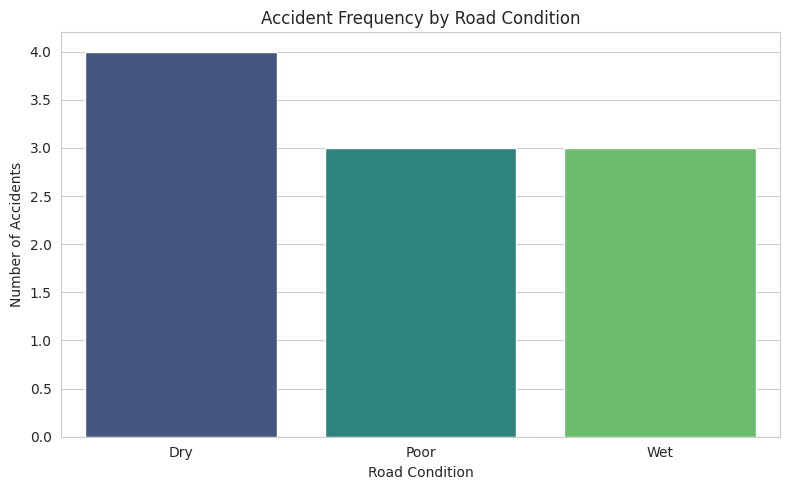

/tmp/ipython-input-3951448668.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accidents_by_weather_condition.index, y=accidents_by_weather_condition.values, palette='mako')


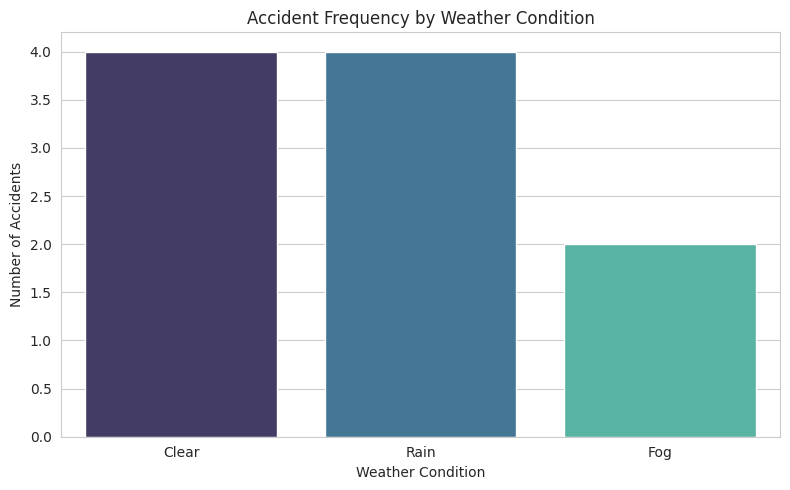

/tmp/ipython-input-3951448668.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accidents_by_time_of_day.index, y=accidents_by_time_of_day.values, palette='flare')


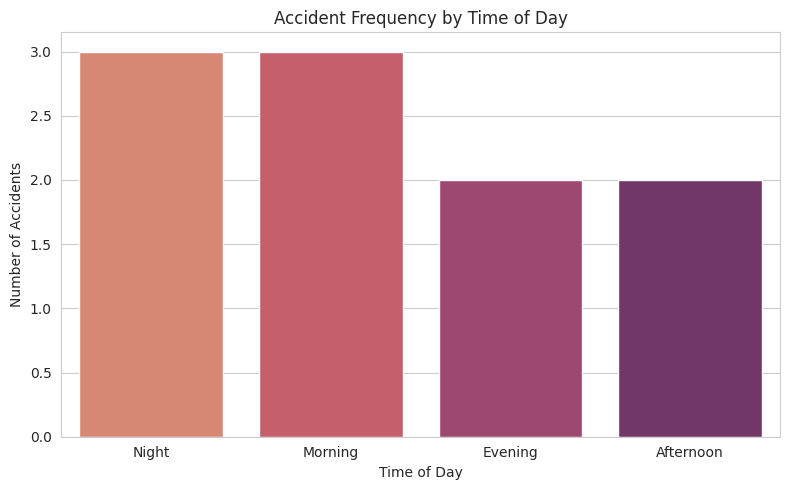

/tmp/ipython-input-3951448668.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accidents_by_city.index, y=accidents_by_city.values, palette='magma')


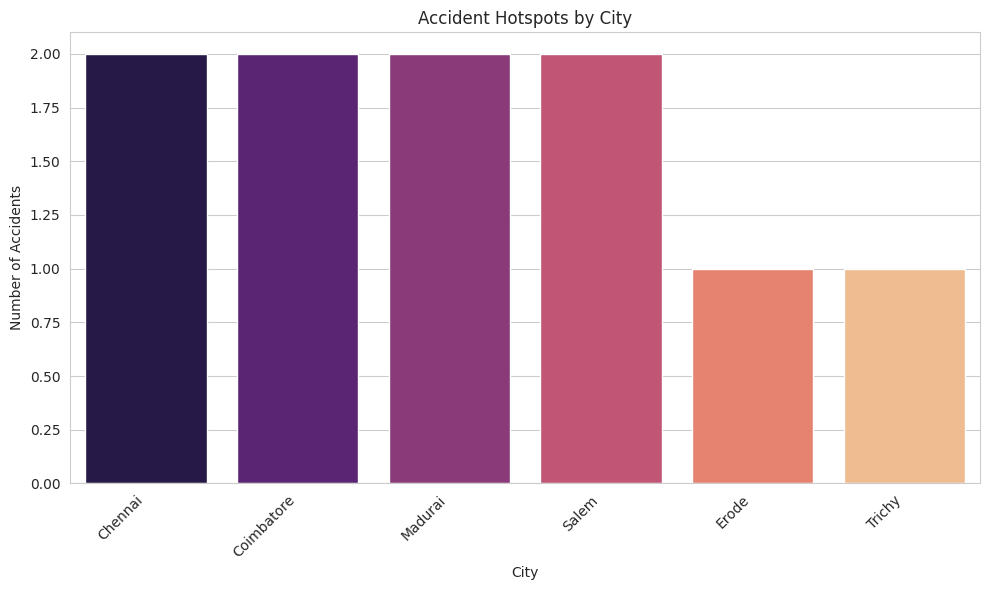

Generated visualizations for accident patterns.


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style("whitegrid")


plt.figure(figsize=(8, 5))
sns.barplot(x=accidents_by_road_condition.index, y=accidents_by_road_condition.values, palette='viridis')
plt.title('Accident Frequency by Road Condition')
plt.xlabel('Road Condition')
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 5))
sns.barplot(x=accidents_by_weather_condition.index, y=accidents_by_weather_condition.values, palette='mako')
plt.title('Accident Frequency by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 5))
sns.barplot(x=accidents_by_time_of_day.index, y=accidents_by_time_of_day.values, palette='flare')
plt.title('Accident Frequency by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
sns.barplot(x=accidents_by_city.index, y=accidents_by_city.values, palette='magma')
plt.title('Accident Hotspots by City')
plt.xlabel('City')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Generated visualizations for accident patterns.")

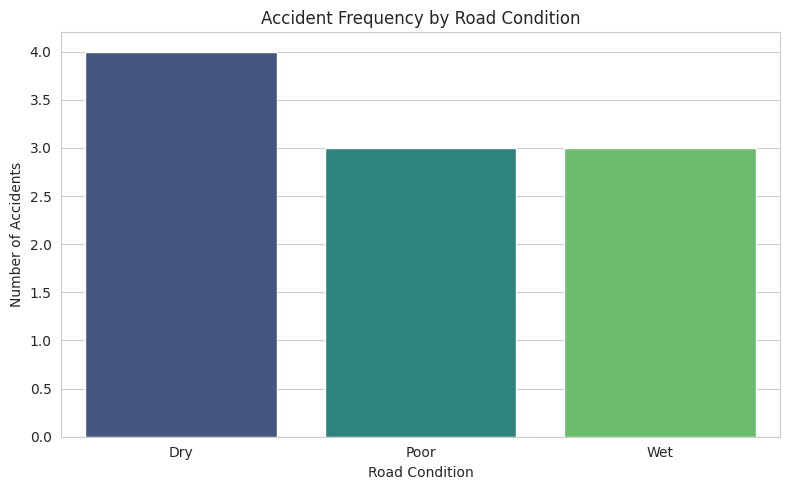

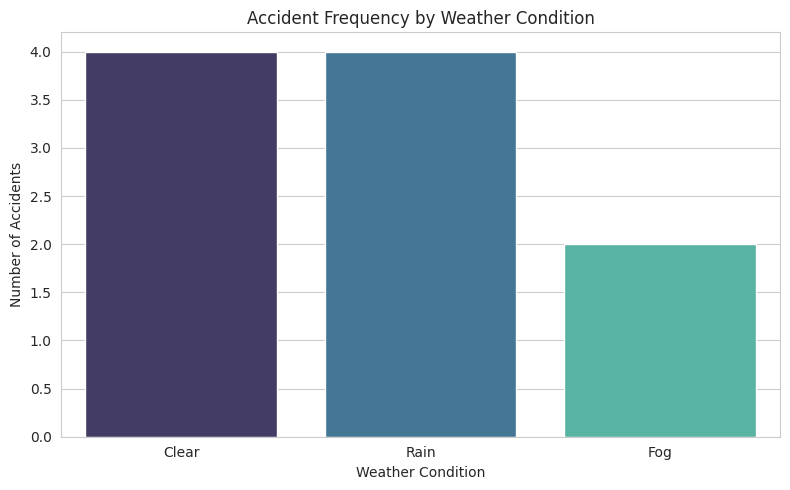

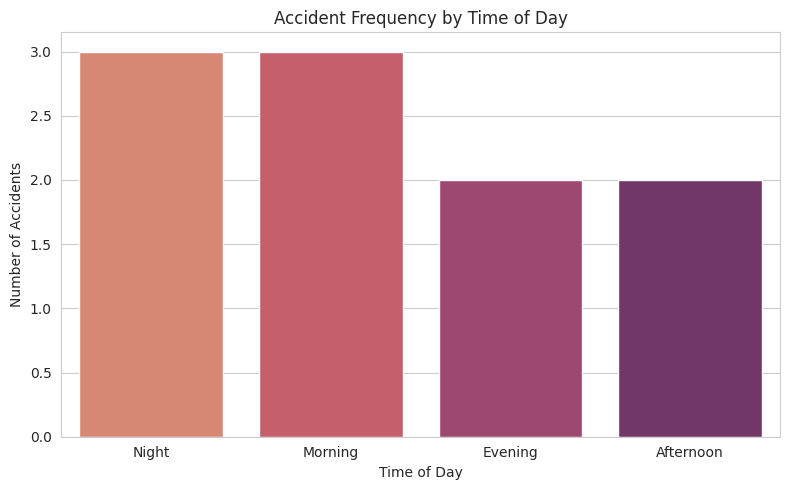

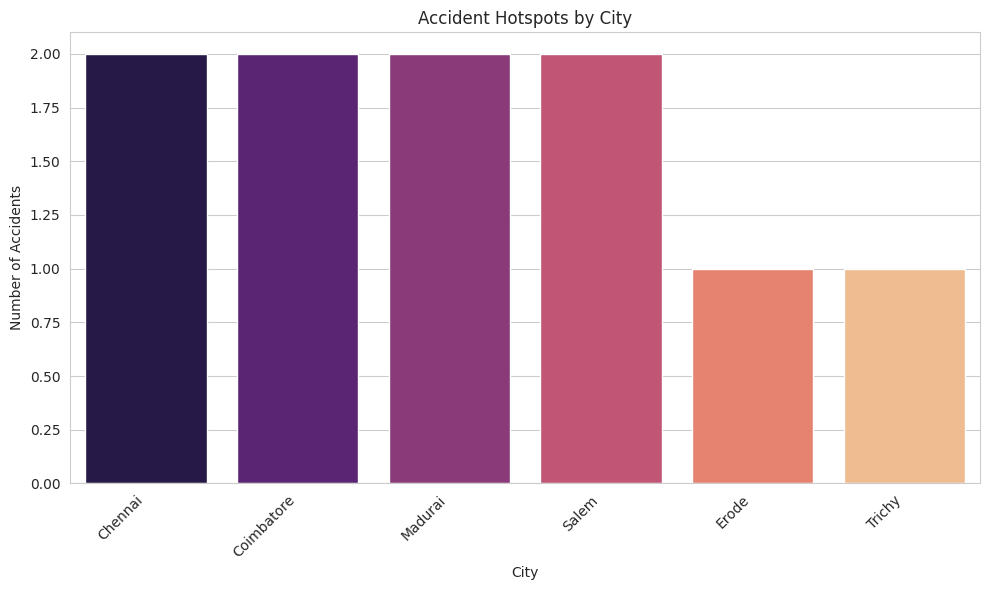

Generated visualizations for accident patterns.


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style("whitegrid")


plt.figure(figsize=(8, 5))
sns.barplot(x=accidents_by_road_condition.index, y=accidents_by_road_condition.values, hue=accidents_by_road_condition.index, palette='viridis', legend=False)
plt.title('Accident Frequency by Road Condition')
plt.xlabel('Road Condition')
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 5))
sns.barplot(x=accidents_by_weather_condition.index, y=accidents_by_weather_condition.values, hue=accidents_by_weather_condition.index, palette='mako', legend=False)
plt.title('Accident Frequency by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 5))
sns.barplot(x=accidents_by_time_of_day.index, y=accidents_by_time_of_day.values, hue=accidents_by_time_of_day.index, palette='flare', legend=False)
plt.title('Accident Frequency by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=accidents_by_city.index, y=accidents_by_city.values, hue=accidents_by_city.index, palette='magma', legend=False)
plt.title('Accident Hotspots by City')
plt.xlabel('City')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Generated visualizations for accident patterns.")